# Importing Librairies 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from math import *
import scipy.stats as sc
import goslate

# Importing Data

In [2]:
data=pd.read_csv('cleanfile.csv')

/home/taher/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Data Preparation 

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114348 entries, 0 to 114347
Data columns (total 35 columns):
Unnamed: 0                                 114348 non-null int64
code                                       114348 non-null object
url                                        114348 non-null object
creator                                    114348 non-null object
created_t                                  114348 non-null int64
created_datetime                           114348 non-null object
last_modified_t                            114348 non-null int64
last_modified_datetime                     114348 non-null object
product_name                               114348 non-null object
brands                                     114348 non-null object
brands_tags                                114348 non-null object
countries                                  114348 non-null object
countries_tags                             114348 non-null object
countries_fr                      

In [4]:
#We will arrange the data by type, we will make object columns at first , then we make the
#numeric columns. This organisation can ease us the exploration of variables .
list_obj=[] 
list_num=[]
for c in data.columns:
    if data[c].dtypes==object:
        list_obj.append(c)
    else:
        list_num.append(c)
lis=list_obj+list_num
data=data[lis]

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114348 entries, 0 to 114347
Data columns (total 35 columns):
code                                       114348 non-null object
url                                        114348 non-null object
creator                                    114348 non-null object
created_datetime                           114348 non-null object
last_modified_datetime                     114348 non-null object
product_name                               114348 non-null object
brands                                     114348 non-null object
brands_tags                                114348 non-null object
countries                                  114348 non-null object
countries_tags                             114348 non-null object
countries_fr                               114348 non-null object
ingredients_text                           114348 non-null object
serving_size                               114348 non-null object
additives                      

In [6]:
data[list_obj].head() # display object columns

code                                                url          creator  \
0   4559  http://world-fr.openfoodfacts.org/produit/0000...  usda-ndb-import   
1  16872  http://world-fr.openfoodfacts.org/produit/0000...  usda-ndb-import   
2  18265  http://world-fr.openfoodfacts.org/produit/0000...  usda-ndb-import   
3  18289  http://world-fr.openfoodfacts.org/produit/0000...  usda-ndb-import   
4  18357  http://world-fr.openfoodfacts.org/produit/0000...  usda-ndb-import   

       created_datetime last_modified_datetime  \
0  2017-03-09T14:32:37Z   2017-03-09T14:32:37Z   
1  2017-03-09T10:34:10Z   2017-03-09T10:34:11Z   
2  2017-03-09T10:35:06Z   2017-03-09T10:35:06Z   
3  2017-03-09T10:34:14Z   2017-03-09T10:34:15Z   
4  2017-03-10T09:34:46Z   2017-03-10T09:34:46Z   

                            product_name          brands   brands_tags  \
0                                Peanuts  Torn & Glasser  torn-glasser   
1                          Zen Party Mix        Sunridge      sunridge   
2                       Energy Power Mix        Sunridge      sunridge   
3  Antioxidant Mix - Berries & Chocolate        Sunridge      sunridge   
4              Peanut Butter Power Chews        Sunridge      sunridge   

  countries    countries_tags countries_fr  \
0        US  en:united-states   États-Unis   
1        US  en:united-states   États-Unis   
2        US  en:united-states   États-Unis   
3        US  en:united-states   États-Unis   
4        US  en:united-states   États-Unis   

                                    ingredients_text     serving_size  \
0  Peanuts, wheat flour, sugar, rice flour, tapio...  28 g (0.25 cup)   
1  Roasted peanuts (peanuts, peanut or canola oil...  30 g (0.25 cup)   
2  Yogurt raisins, tamari roasted almonds, organi...  40 g (0.25 cup)   
3  Chocolate stars (dehydrated cane juice, sweete...  30 g (0.25 cup)   
4  Peanut butter (dry roasted peanuts, palm oil, ...    45 g (45 GRM)   

                                           additives nutrition_grade_fr  \
0   [ peanuts -> en:peanuts  ]  [ wheat-flour -> ...                  b   
1   [ roasted-peanuts -> en:roasted-peanuts  ]  [...                  d   
2   [ yogurt-raisins -> en:yogurt-raisins  ]  [ r...                  d   
3   [ chocolate-stars -> en:chocolate-stars  ]  [...                  d   
4   [ peanut-butter -> en:peanut-butter  ]  [ but...                  c   

                                              states  \
0  en:to-be-completed, en:nutrition-facts-complet...   
1  en:to-be-completed, en:nutrition-facts-complet...   
2  en:to-be-completed, en:nutrition-facts-complet...   
3  en:to-be-completed, en:nutrition-facts-complet...   
4  en:to-be-completed, en:nutrition-facts-complet...   

                                         states_tags  \
0  en:to-be-completed,en:nutrition-facts-complete...   
1  en:to-be-completed,en:nutrition-facts-complete...   
2  en:to-be-completed,en:nutrition-facts-complete...   
3  en:to-be-completed,en:nutrition-facts-complete...   
4  en:to-be-completed,en:nutrition-facts-complete...   

                                           states_fr  
0  A compléter,Informations nutritionnelles compl...  
1  A compléter,Informations nutritionnelles compl...  
2  A compléter,Informations nutritionnelles compl...  
3  A compléter,Informations nutritionnelles compl...  
4  A compléter,Informations nutritionnelles compl...

We had noticed above that there is likely many duplicate columns. For example we find that:  
-The columns brands and brands_tags are the same.So we will save only the column brands.  
-The columns countries ,countries_tags and countries_fr are the same. So we will save only the column countries_fr.  
-the column states and states_tags are the same .So we will save only the column states.

In [7]:
del (data["brands_tags"])
del (data["countries_tags"])
del (data["countries"])
del (data["states_tags"])
list_obj.remove("brands_tags")
list_obj.remove("countries_tags")
list_obj.remove("countries")
list_obj.remove("states_tags")


In [8]:
data[list_obj].head() #display object columns after deleting duplicate columns

code                                                url          creator  \
0   4559  http://world-fr.openfoodfacts.org/produit/0000...  usda-ndb-import   
1  16872  http://world-fr.openfoodfacts.org/produit/0000...  usda-ndb-import   
2  18265  http://world-fr.openfoodfacts.org/produit/0000...  usda-ndb-import   
3  18289  http://world-fr.openfoodfacts.org/produit/0000...  usda-ndb-import   
4  18357  http://world-fr.openfoodfacts.org/produit/0000...  usda-ndb-import   

       created_datetime last_modified_datetime  \
0  2017-03-09T14:32:37Z   2017-03-09T14:32:37Z   
1  2017-03-09T10:34:10Z   2017-03-09T10:34:11Z   
2  2017-03-09T10:35:06Z   2017-03-09T10:35:06Z   
3  2017-03-09T10:34:14Z   2017-03-09T10:34:15Z   
4  2017-03-10T09:34:46Z   2017-03-10T09:34:46Z   

                            product_name          brands countries_fr  \
0                                Peanuts  Torn & Glasser   États-Unis   
1                          Zen Party Mix        Sunridge   États-Unis   
2                       Energy Power Mix        Sunridge   États-Unis   
3  Antioxidant Mix - Berries & Chocolate        Sunridge   États-Unis   
4              Peanut Butter Power Chews        Sunridge   États-Unis   

                                    ingredients_text     serving_size  \
0  Peanuts, wheat flour, sugar, rice flour, tapio...  28 g (0.25 cup)   
1  Roasted peanuts (peanuts, peanut or canola oil...  30 g (0.25 cup)   
2  Yogurt raisins, tamari roasted almonds, organi...  40 g (0.25 cup)   
3  Chocolate stars (dehydrated cane juice, sweete...  30 g (0.25 cup)   
4  Peanut butter (dry roasted peanuts, palm oil, ...    45 g (45 GRM)   

                                           additives nutrition_grade_fr  \
0   [ peanuts -> en:peanuts  ]  [ wheat-flour -> ...                  b   
1   [ roasted-peanuts -> en:roasted-peanuts  ]  [...                  d   
2   [ yogurt-raisins -> en:yogurt-raisins  ]  [ r...                  d   
3   [ chocolate-stars -> en:chocolate-stars  ]  [...                  d   
4   [ peanut-butter -> en:peanut-butter  ]  [ but...                  c   

                                              states  \
0  en:to-be-completed, en:nutrition-facts-complet...   
1  en:to-be-completed, en:nutrition-facts-complet...   
2  en:to-be-completed, en:nutrition-facts-complet...   
3  en:to-be-completed, en:nutrition-facts-complet...   
4  en:to-be-completed, en:nutrition-facts-complet...   

                                           states_fr  
0  A compléter,Informations nutritionnelles compl...  
1  A compléter,Informations nutritionnelles compl...  
2  A compléter,Informations nutritionnelles compl...  
3  A compléter,Informations nutritionnelles compl...  
4  A compléter,Informations nutritionnelles compl...

After deleting of duplicate columns , we should mention that many columns are useless for our analyse. For example:  
-We can mention that column of code and product_name can give the same information.So we will keep only product_name.  
-The column namely url is not useful for our analyse. So we can get red of it.  
-The columns namely created_datetime, last_modified_datetime are not useful for our goal.So we will get red of it.  
-The column of creator of product , can not be interesting for our analyse. So we will get red of it.


In [9]:
del(data["code"])
del(data["url"])
del(data["created_datetime"])
del(data["last_modified_datetime"])
del(data["creator"])
list_obj.remove("code")
list_obj.remove("url")
list_obj.remove("created_datetime")
list_obj.remove("last_modified_datetime")
list_obj.remove("creator")

In [10]:
data[list_obj].head() # display the final version of object columns after deleting duplicates and useless columns.

product_name          brands countries_fr  \
0                                Peanuts  Torn & Glasser   États-Unis   
1                          Zen Party Mix        Sunridge   États-Unis   
2                       Energy Power Mix        Sunridge   États-Unis   
3  Antioxidant Mix - Berries & Chocolate        Sunridge   États-Unis   
4              Peanut Butter Power Chews        Sunridge   États-Unis   

                                    ingredients_text     serving_size  \
0  Peanuts, wheat flour, sugar, rice flour, tapio...  28 g (0.25 cup)   
1  Roasted peanuts (peanuts, peanut or canola oil...  30 g (0.25 cup)   
2  Yogurt raisins, tamari roasted almonds, organi...  40 g (0.25 cup)   
3  Chocolate stars (dehydrated cane juice, sweete...  30 g (0.25 cup)   
4  Peanut butter (dry roasted peanuts, palm oil, ...    45 g (45 GRM)   

                                           additives nutrition_grade_fr  \
0   [ peanuts -> en:peanuts  ]  [ wheat-flour -> ...                  b   
1   [ roasted-peanuts -> en:roasted-peanuts  ]  [...                  d   
2   [ yogurt-raisins -> en:yogurt-raisins  ]  [ r...                  d   
3   [ chocolate-stars -> en:chocolate-stars  ]  [...                  d   
4   [ peanut-butter -> en:peanut-butter  ]  [ but...                  c   

                                              states  \
0  en:to-be-completed, en:nutrition-facts-complet...   
1  en:to-be-completed, en:nutrition-facts-complet...   
2  en:to-be-completed, en:nutrition-facts-complet...   
3  en:to-be-completed, en:nutrition-facts-complet...   
4  en:to-be-completed, en:nutrition-facts-complet...   

                                           states_fr  
0  A compléter,Informations nutritionnelles compl...  
1  A compléter,Informations nutritionnelles compl...  
2  A compléter,Informations nutritionnelles compl...  
3  A compléter,Informations nutritionnelles compl...  
4  A compléter,Informations nutritionnelles compl...

In [11]:
data[list_num].head() #display numerical columns

Unnamed: 0   created_t  last_modified_t  additives_n  \
0           2  1489069957       1489069957          0.0   
1          12  1489055650       1489055651          1.0   
2          20  1489055706       1489055706          0.0   
3          21  1489055654       1489055655          1.0   
4          24  1489138486       1489138486          3.0   

   ingredients_from_palm_oil_n  ingredients_that_may_be_from_palm_oil_n  \
0                          0.0                                      0.0   
1                          0.0                                      0.0   
2                          0.0                                      0.0   
3                          0.0                                      0.0   
4                          0.0                                      0.0   

   energy_100g  fat_100g  saturated-fat_100g  carbohydrates_100g  sugars_100g  \
0       1941.0     17.86                0.00               60.71        17.86   
1       2230.0     36.67                5.00               36.67         3.33   
2       1464.0     17.50                7.50               42.50        32.50   
3       2092.0     33.33                6.67               46.67        30.00   
4       1954.0     20.00                2.22               60.00        33.33   

   fiber_100g  proteins_100g  salt_100g  sodium_100g  nutrition-score-fr_100g  \
0         7.1          17.86    0.63500        0.250                      0.0   
1         6.7          16.67    1.60782        0.633                     12.0   
2         5.0           7.50    0.28448        0.112                     14.0   
3         6.7          13.33    0.46482        0.183                     15.0   
4         4.4           8.89    0.19812        0.078                      9.0   

   nutrition-score-uk_100g  
0                      0.0  
1                     12.0  
2                     14.0  
3                     15.0  
4                      9.0

In [12]:
data[list_num].describe() # statistics of each numerical column 

Unnamed: 0     created_t  last_modified_t    additives_n  \
count  114348.000000  1.143480e+05     1.143480e+05  114348.000000   
mean   113257.695386  1.479521e+09     1.484967e+09       2.164699   
std     77113.630631  2.778597e+07     1.467861e+07       2.623329   
min         2.000000  1.328972e+09     1.338852e+09       0.000000   
25%     50753.750000  1.489057e+09     1.489058e+09       0.000000   
50%    102467.500000  1.489072e+09     1.489073e+09       1.000000   
75%    156960.000000  1.489095e+09     1.489096e+09       3.000000   
max    320768.000000  1.492722e+09     1.492727e+09      31.000000   

       ingredients_from_palm_oil_n  ingredients_that_may_be_from_palm_oil_n  \
count                114348.000000                            114348.000000   
mean                      0.015855                                 0.053477   
std                       0.127205                                 0.258349   
min                       0.000000                                 0.000000   
25%                       0.000000                                 0.000000   
50%                       0.000000                                 0.000000   
75%                       0.000000                                 0.000000   
max                       2.000000                                 6.000000   

         energy_100g       fat_100g  saturated-fat_100g  carbohydrates_100g  \
count  114348.000000  114348.000000       114348.000000       114348.000000   
mean     1014.706837       9.852145            3.190077           32.556176   
std       696.972998      11.208988            4.210759           26.638340   
min         0.000000       0.000000            0.000000            0.000000   
25%       351.000000       0.600000            0.000000            8.570000   
50%       962.000000       5.260000            1.200000           23.860000   
75%      1598.000000      16.670000            5.260000           57.140000   
max      3515.000000      52.220000           17.460000          100.000000   

         sugars_100g     fiber_100g  proteins_100g      salt_100g  \
count  114348.000000  114348.000000  114348.000000  114348.000000   
mean       12.480537       2.001966       6.188586       0.813685   
std        14.651303       2.147178       5.385384       0.754613   
min         0.000000       0.000000      -3.570000       0.000000   
25%         1.770000       0.000000       2.000000       0.134620   
50%         5.310000       1.500000       5.000000       0.680720   
75%        20.000000       3.300000       9.000000       1.231900   
max        57.100000       8.930000      23.260000       3.281680   

         sodium_100g  nutrition-score-fr_100g  nutrition-score-uk_100g  
count  114348.000000            114348.000000            114348.000000  
mean        0.320348                 7.268592                 7.180161  
std         0.297092                 8.590167                 8.622536  
min         0.000000               -13.000000               -13.000000  
25%         0.053000                 0.000000                 0.000000  
50%         0.268000                 6.000000                 5.000000  
75%         0.485000                14.000000                14.000000  
max         1.292000                36.000000                36.000000

I finish this part by delete the columns namely "created_t" and "last_modified_t", which we consider not useful for our
work.

In [13]:
del(data["created_t"])
del(data["last_modified_t"])
list_num.remove("created_t")
list_num.remove("last_modified_t")

In [14]:
data.head() #display the head of the whole data 

product_name          brands countries_fr  \
0                                Peanuts  Torn & Glasser   États-Unis   
1                          Zen Party Mix        Sunridge   États-Unis   
2                       Energy Power Mix        Sunridge   États-Unis   
3  Antioxidant Mix - Berries & Chocolate        Sunridge   États-Unis   
4              Peanut Butter Power Chews        Sunridge   États-Unis   

                                    ingredients_text     serving_size  \
0  Peanuts, wheat flour, sugar, rice flour, tapio...  28 g (0.25 cup)   
1  Roasted peanuts (peanuts, peanut or canola oil...  30 g (0.25 cup)   
2  Yogurt raisins, tamari roasted almonds, organi...  40 g (0.25 cup)   
3  Chocolate stars (dehydrated cane juice, sweete...  30 g (0.25 cup)   
4  Peanut butter (dry roasted peanuts, palm oil, ...    45 g (45 GRM)   

                                           additives nutrition_grade_fr  \
0   [ peanuts -> en:peanuts  ]  [ wheat-flour -> ...                  b   
1   [ roasted-peanuts -> en:roasted-peanuts  ]  [...                  d   
2   [ yogurt-raisins -> en:yogurt-raisins  ]  [ r...                  d   
3   [ chocolate-stars -> en:chocolate-stars  ]  [...                  d   
4   [ peanut-butter -> en:peanut-butter  ]  [ but...                  c   

                                              states  \
0  en:to-be-completed, en:nutrition-facts-complet...   
1  en:to-be-completed, en:nutrition-facts-complet...   
2  en:to-be-completed, en:nutrition-facts-complet...   
3  en:to-be-completed, en:nutrition-facts-complet...   
4  en:to-be-completed, en:nutrition-facts-complet...   

                                           states_fr  Unnamed: 0  \
0  A compléter,Informations nutritionnelles compl...           2   
1  A compléter,Informations nutritionnelles compl...          12   
2  A compléter,Informations nutritionnelles compl...          20   
3  A compléter,Informations nutritionnelles compl...          21   
4  A compléter,Informations nutritionnelles compl...          24   

            ...             fat_100g  saturated-fat_100g  carbohydrates_100g  \
0           ...                17.86                0.00               60.71   
1           ...                36.67                5.00               36.67   
2           ...                17.50                7.50               42.50   
3           ...                33.33                6.67               46.67   
4           ...                20.00                2.22               60.00   

   sugars_100g  fiber_100g  proteins_100g  salt_100g  sodium_100g  \
0        17.86         7.1          17.86    0.63500        0.250   
1         3.33         6.7          16.67    1.60782        0.633   
2        32.50         5.0           7.50    0.28448        0.112   
3        30.00         6.7          13.33    0.46482        0.183   
4        33.33         4.4           8.89    0.19812        0.078   

   nutrition-score-fr_100g  nutrition-score-uk_100g  
0                      0.0                      0.0  
1                     12.0                     12.0  
2                     14.0                     14.0  
3                     15.0                     15.0  
4                      9.0                      9.0  

[5 rows x 24 columns]

In [15]:
# the column 'serving_size' has many informations. We will keep only the useful information which  correspond
#to the amount of a nutriment (in g, or kJ for energy) for 1 serving of the product.
def pos_par(exp):
    """this function, allow to detect the first position of parenthesis in the introduced expression.
        
        Args:
        
        exp(str): the expresion that the function,will examinate to underline the first position of parenthesis.
        
        Returns:
        
        position(int): the function return position of parenthesis in the expresion or -1 if the expresion not contains 
        any parenthesis.
    """
    i=-1
    j=0
    for s in exp:
        if c!='(':
           j+=1
        else:
            i=j
    return i


In [16]:
data['serving_size']=[c[0:pos_par(c)] for c in data['serving_size'].values]

In [17]:
data['serving_size'].describe() #statistics of the column 'serving_size' after deleting all useless informations.

count           114348
unique           16639
top       30 g (2 Tbsp
freq              2146
Name: serving_size, dtype: object

In [18]:
# We will check how many unit, used in this column. We will try to change the type of this column to a numerical type.
def unit_used(exp,li):
    """"this function allow to identify the used unit in a measurement.
        If the unit identified by the function not exist in a list introduced as argument.
        The function add this new unit in the list.
        
        Args:
        
        exp(str): the expression of the measurement, which the function will examinate.
        li(list): the list that the function used to add on it a new unit if it is available.
        
        Returns:
        
        li(list): the function return the introduced list, enhanced by new unit.
    """
    
    for s in exp:
        if s.lower() in ('g','j'):
            if s.lower() not in li:
                li.append(s.lower())
            break
        

In [19]:
unit=[]
for c in data['serving_size'].values:
    unit_used(c,unit)

In [20]:
unit

['g', 'j']

In [21]:
#So we can not change the column of 'serving_size' into numerical'column.

# Data exploration 

<Figure size 2880x4320 with 0 Axes>

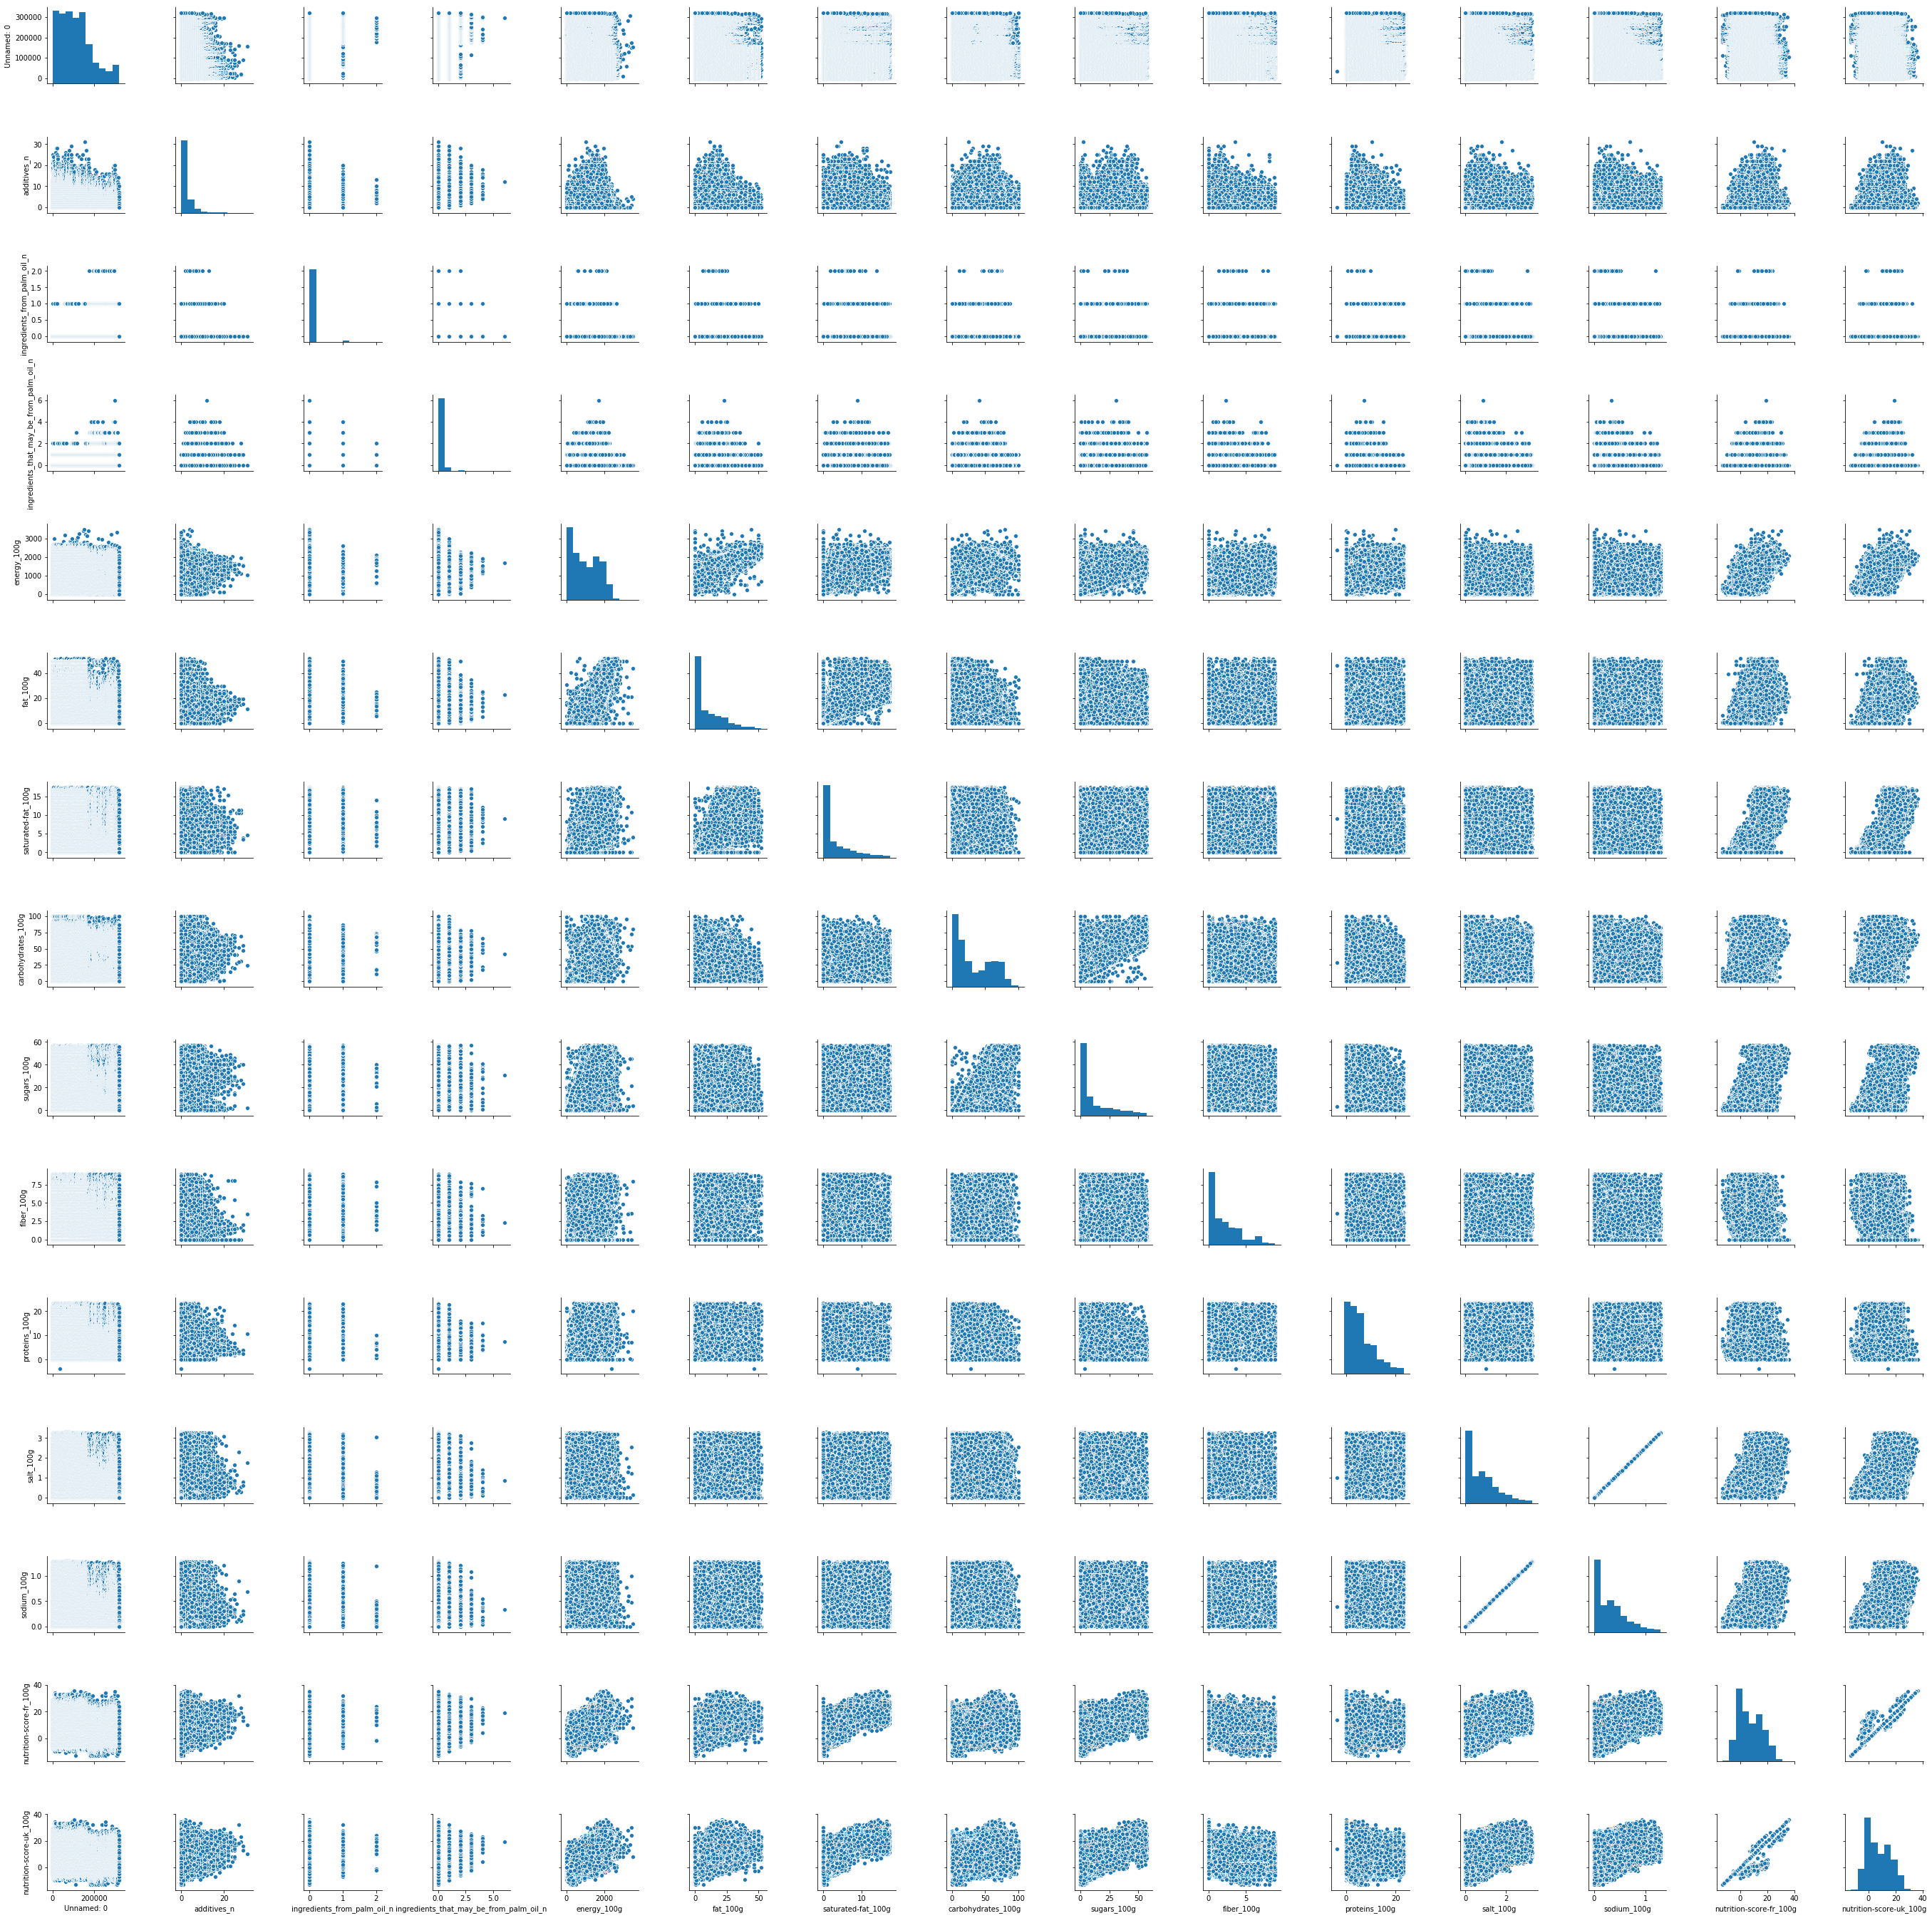

In [22]:
#Hereunder, we will explorate links between variables.
fig=plt.figure(figsize=(40,60))
sns.pairplot(data[list_num])

# Univariate Analysis

# Quantitive variables

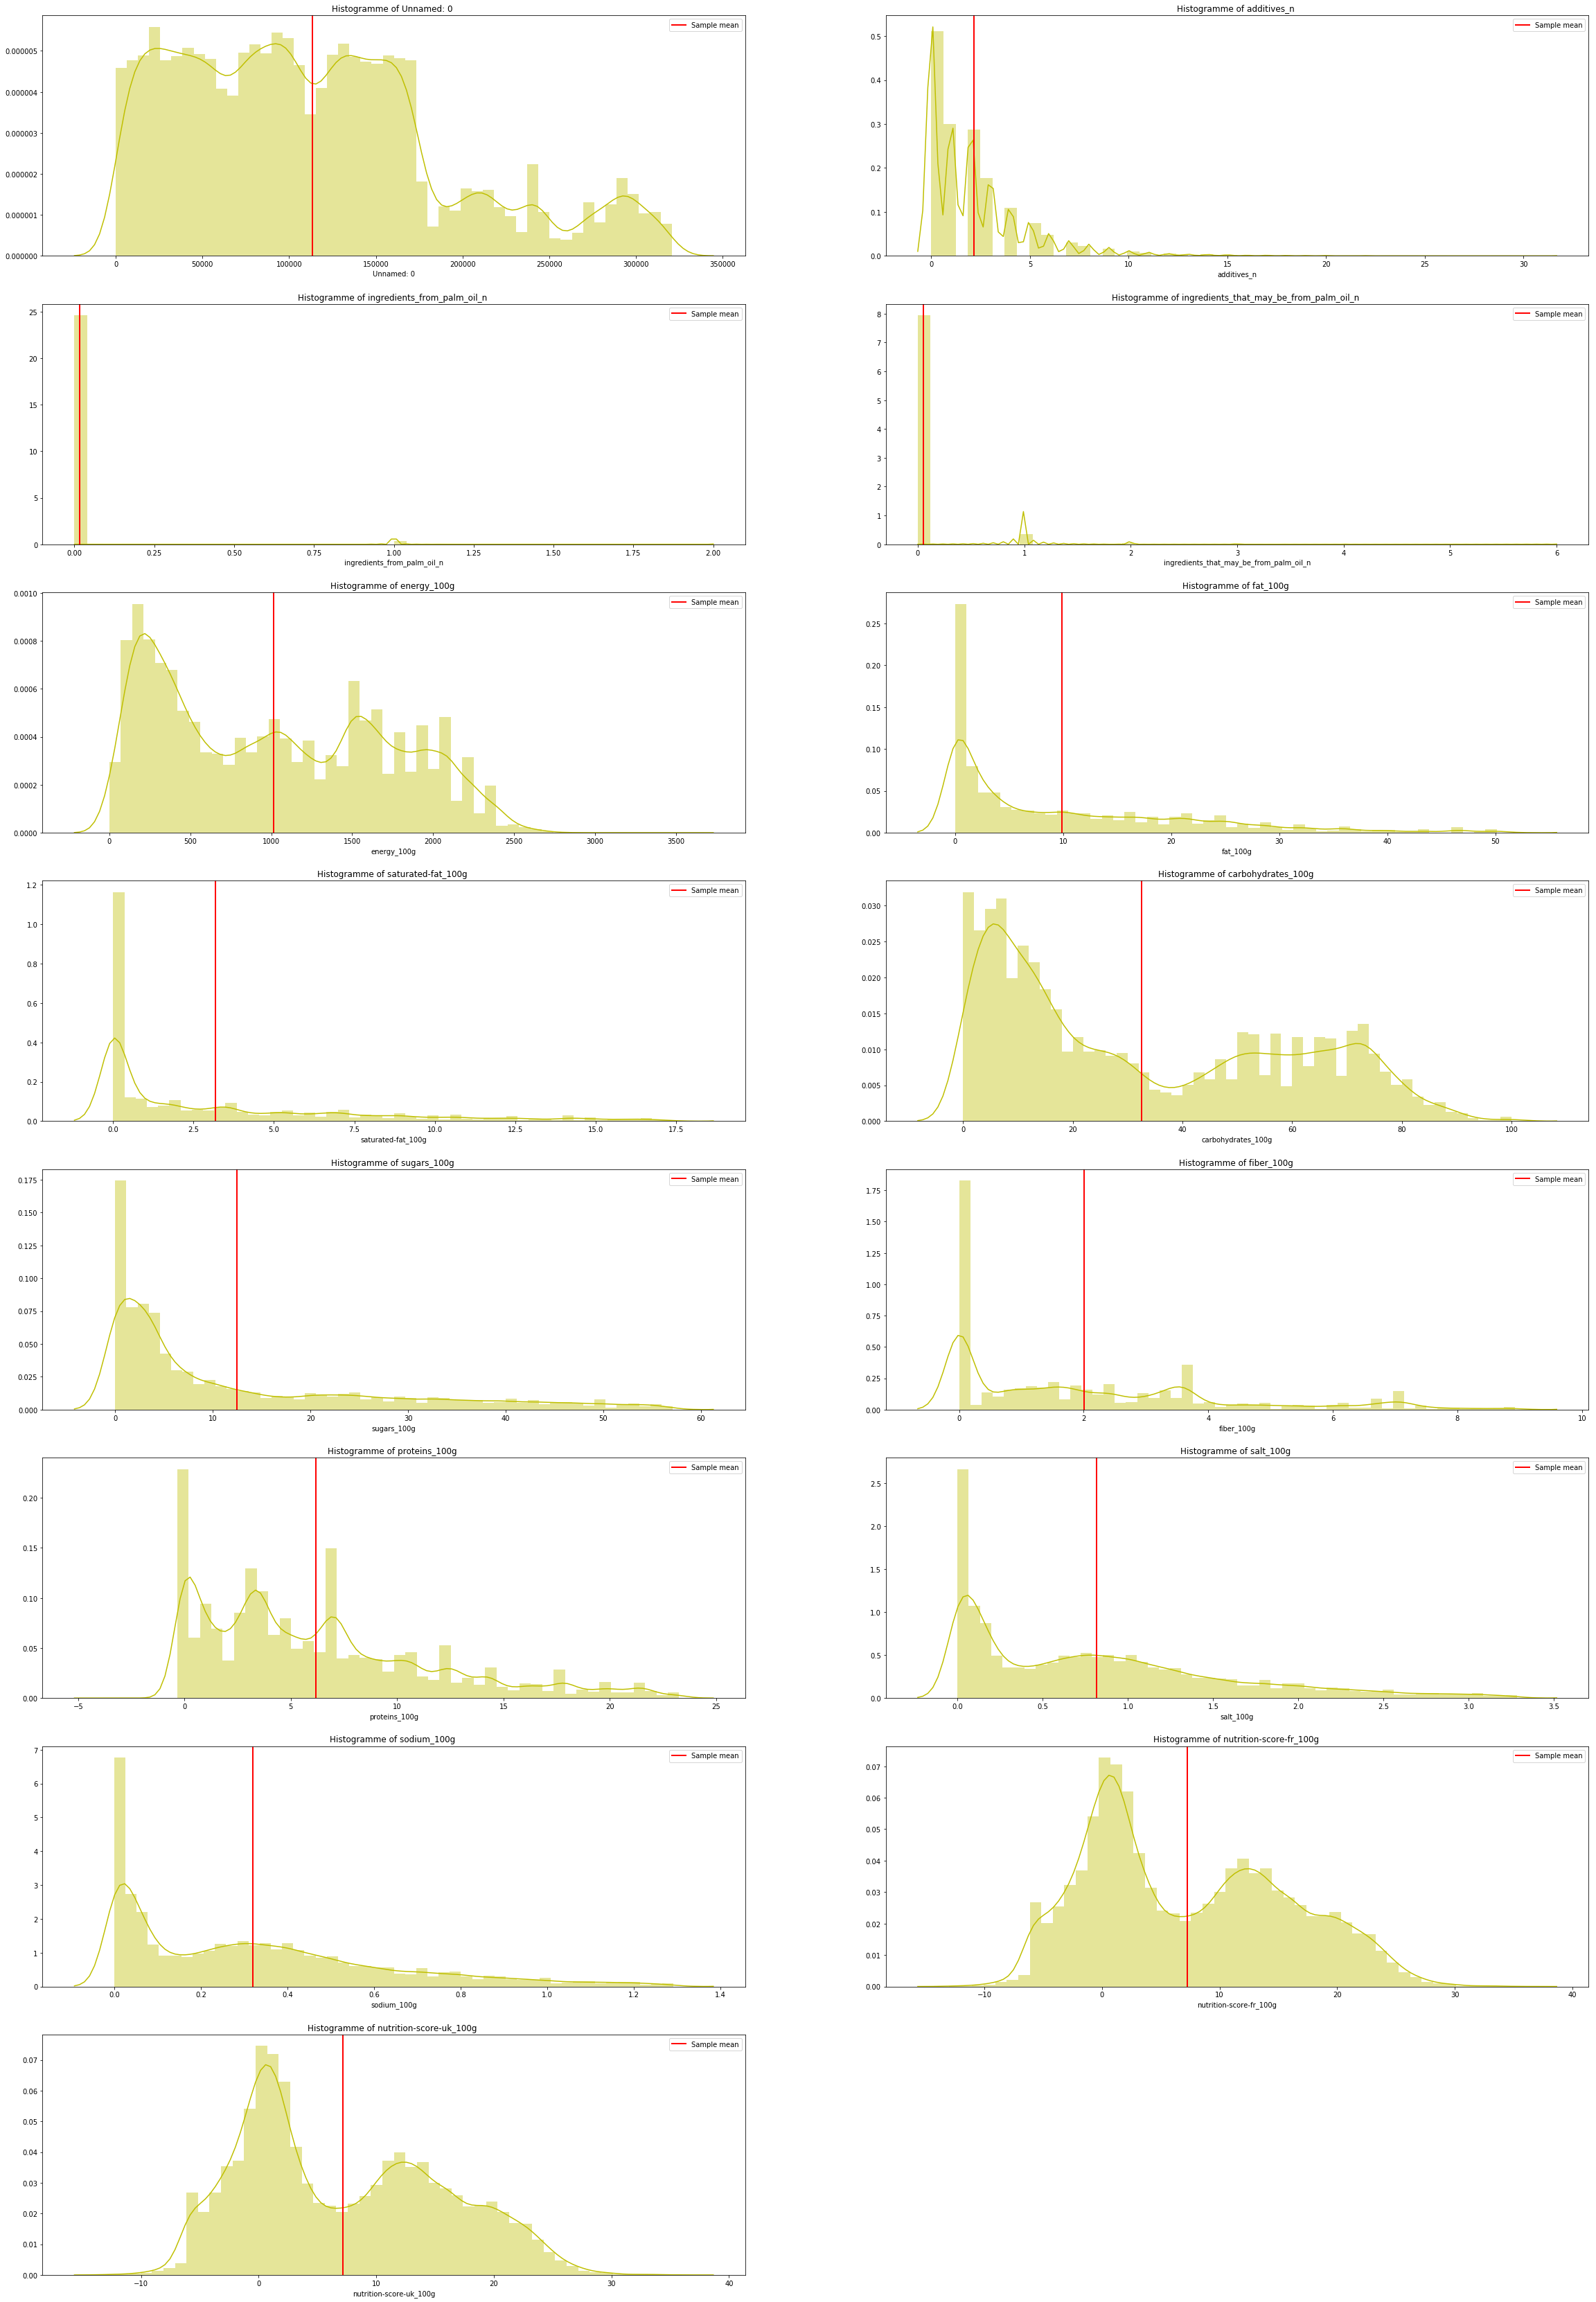

In [23]:
# We will try in the next part, to look for a static model for each  quantitive feature.
l=len(list_num)
fig=plt.figure(figsize=(40,60))
n_ligne=ceil(l/2)
i=0
b=0
n=len(data)
for c in list_num:
    i+=1
    
    fig.add_subplot(n_ligne,2,i)
    xbar=data[c].mean()
    sns.distplot(data[c],color='y')
    plt.axvline(xbar,color='r',linewidth=2,label='Sample mean')
    plt.title("Histogramme of {} ".format(c))
    plt.legend(loc='upper right')

From the graphics above, we can not notice that there is a variable, that can follow a standards statistic model.Below, we will
give a table wchich summarize the statistic propreties of each feature.

In [24]:
table={}
for c in list_num:
    table[c]=[data[c].mean(),data[c].var(ddof=1),data[c].std(ddof=1),np.median(data[c]),data[c].skew(),data[c].kurtosis()]
pd.DataFrame(table,index=["Mean","Variance","Standard deviation","Median","Symetrie measurement"," Flattening measurement"],columns=list_num)   

Unnamed: 0  additives_n  \
Mean                     1.132577e+05     2.164699   
Variance                 5.946512e+09     6.881853   
Standard deviation       7.711363e+04     2.623329   
Median                   1.024675e+05     1.000000   
Symetrie measurement     7.146788e-01     2.301467   
 Flattening measurement -6.450198e-02     8.553923   

                         ingredients_from_palm_oil_n  \
Mean                                        0.015855   
Variance                                    0.016181   
Standard deviation                          0.127205   
Median                                      0.000000   
Symetrie measurement                        8.168593   
 Flattening measurement                    68.825367   

                         ingredients_that_may_be_from_palm_oil_n  \
Mean                                                    0.053477   
Variance                                                0.066744   
Standard deviation                                      0.258349   
Median                                                  0.000000   
Symetrie measurement                                    5.825033   
 Flattening measurement                                43.493935   

                           energy_100g    fat_100g  saturated-fat_100g  \
Mean                       1014.706837    9.852145            3.190077   
Variance                 485771.359675  125.641417           17.730491   
Standard deviation          696.972998   11.208988            4.210759   
Median                      962.000000    5.260000            1.200000   
Symetrie measurement          0.289084    1.259932            1.420214   
 Flattening measurement      -1.180603    1.023922            1.175880   

                         carbohydrates_100g  sugars_100g  fiber_100g  \
Mean                              32.556176    12.480537    2.001966   
Variance                         709.601149   214.660674    4.610375   
Standard deviation                26.638340    14.651303    2.147178   
Median                            23.860000     5.310000    1.500000   
Symetrie measurement               0.476270     1.287101    1.085875   
 Flattening measurement           -1.196807     0.564341    0.448805   

                         proteins_100g  salt_100g  sodium_100g  \
Mean                          6.188586   0.813685     0.320348   
Variance                     29.002362   0.569441     0.088263   
Standard deviation            5.385384   0.754613     0.297092   
Median                        5.000000   0.680720     0.268000   
Symetrie measurement          0.999042   0.962233     0.962231   
 Flattening measurement       0.434270   0.326241     0.326237   

                         nutrition-score-fr_100g  nutrition-score-uk_100g  
Mean                                    7.268592                 7.180161  
Variance                               73.790967                74.348129  
Standard deviation                      8.590167                 8.622536  
Median                                  6.000000                 5.000000  
Symetrie measurement                    0.361328                 0.374686  
 Flattening measurement                -0.907316                -0.917284

Text(0.5,1,'Camembert de nutrition_grade_fr')

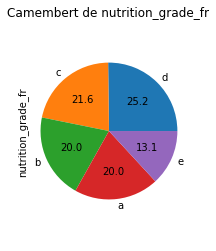

In [25]:
# Proportion of the various grad'products
fig=plt.figure()
fig.add_subplot(1,2,1)
data['nutrition_grade_fr'].value_counts(normalize=True).plot(kind="pie",autopct="%1.1f")
plt.axis("equal")
plt.title("Camembert de nutrition_grade_fr")


# Multivariate Analyse 

Hereunder we will create a table, which sumarize the links between each pair of quantity  variable based to the value of 
the pearson correlation between them.

    

In [26]:
from scipy.stats import pearsonr
table=pd.DataFrame(columns=list_num,index=list_num)
for c in list_num: # browse the quantitative variables
    li_c=[]
    for t in list_num:
       
        li_c.append(pearsonr(data[c],data[t])[0])
    table[c] =li_c   
table    

Unnamed: 0  additives_n  \
Unnamed: 0                                 1.000000    -0.073379   
additives_n                               -0.073379     1.000000   
ingredients_from_palm_oil_n                0.218660     0.095326   
ingredients_that_may_be_from_palm_oil_n    0.148706     0.285107   
energy_100g                               -0.007199     0.121243   
fat_100g                                  -0.008876     0.034280   
saturated-fat_100g                         0.022656     0.117941   
carbohydrates_100g                        -0.015108     0.157919   
sugars_100g                               -0.004216     0.185988   
fiber_100g                                 0.049539    -0.127250   
proteins_100g                              0.005499    -0.013437   
salt_100g                                 -0.084838     0.131792   
sodium_100g                               -0.084839     0.131792   
nutrition-score-fr_100g                   -0.041949     0.238644   
nutrition-score-uk_100g                   -0.058042     0.239954   

                                         ingredients_from_palm_oil_n  \
Unnamed: 0                                                  0.218660   
additives_n                                                 0.095326   
ingredients_from_palm_oil_n                                 1.000000   
ingredients_that_may_be_from_palm_oil_n                     0.176179   
energy_100g                                                 0.109795   
fat_100g                                                    0.074724   
saturated-fat_100g                                          0.132175   
carbohydrates_100g                                          0.090957   
sugars_100g                                                 0.082525   
fiber_100g                                                  0.059426   
proteins_100g                                               0.012048   
salt_100g                                                  -0.011303   
sodium_100g                                                -0.011304   
nutrition-score-fr_100g                                     0.101498   
nutrition-score-uk_100g                                     0.102603   

                                         ingredients_that_may_be_from_palm_oil_n  \
Unnamed: 0                                                              0.148706   
additives_n                                                             0.285107   
ingredients_from_palm_oil_n                                             0.176179   
ingredients_that_may_be_from_palm_oil_n                                 1.000000   
energy_100g                                                             0.040785   
fat_100g                                                                0.037298   
saturated-fat_100g                                                      0.083170   
carbohydrates_100g                                                      0.027770   
sugars_100g                                                             0.041200   
fiber_100g                                                             -0.012193   
proteins_100g                                                          -0.021119   
salt_100g                                                              -0.004186   
sodium_100g                                                            -0.004186   
nutrition-score-fr_100g                                                 0.068018   
nutrition-score-uk_100g                                                 0.067730   

                                         energy_100g  fat_100g  \
Unnamed: 0                                 -0.007199 -0.008876   
additives_n                                 0.121243  0.034280   
ingredients_from_palm_oil_n                 0.109795  0.074724   
ingredients_that_may_be_from_palm_oil_n     0.040785  0.037298   
energy_100g                                 1.000000  0.763765   
fat_100g                                    0.763765  1.00

We will clean the table of correlation, we will save only the variables that are highly correlated.

In [27]:
tableau_corr=pd.DataFrame(columns=list_num,index=list_num)

for c in list_num:
    for t in list_num:
        
        if table[t][c]>0.6: #  couple of variables which have pearson correlation over than 0.6, are consederated as highly correlated
            tableau_corr[t][c]=" correlé ({})".format(table[t][c])
tableau_corr=tableau_corr.fillna("-")# We replace low correlation by "-"
tableau_corr

Unnamed: 0     additives_n  \
Unnamed: 0                                correlé (1.0)               -   
additives_n                                           -   correlé (1.0)   
ingredients_from_palm_oil_n                           -               -   
ingredients_that_may_be_from_palm_oil_n               -               -   
energy_100g                                           -               -   
fat_100g                                              -               -   
saturated-fat_100g                                    -               -   
carbohydrates_100g                                    -               -   
sugars_100g                                           -               -   
fiber_100g                                            -               -   
proteins_100g                                         -               -   
salt_100g                                             -               -   
sodium_100g                                           -               -   
nutrition-score-fr_100g                               -               -   
nutrition-score-uk_100g                               -               -   

                                        ingredients_from_palm_oil_n  \
Unnamed: 0                                                        -   
additives_n                                                       -   
ingredients_from_palm_oil_n                           correlé (1.0)   
ingredients_that_may_be_from_palm_oil_n                           -   
energy_100g                                                       -   
fat_100g                                                          -   
saturated-fat_100g                                                -   
carbohydrates_100g                                                -   
sugars_100g                                                       -   
fiber_100g                                                        -   
proteins_100g                                                     -   
salt_100g                                                         -   
sodium_100g                                                       -   
nutrition-score-fr_100g                                           -   
nutrition-score-uk_100g                                           -   

                                        ingredients_that_may_be_from_palm_oil_n  \
Unnamed: 0                                                                    -   
additives_n                                                                   -   
ingredients_from_palm_oil_n                                                   -   
ingredients_that_may_be_from_palm_oil_n                           correlé (1.0)   
energy_100g                                                                   -   
fat_100g                                                                      -   
saturated-fat_100g                                                            -   
carbohydrates_100g                                                            -   
sugars_100g                                                                   -   
fiber_100g                                                                    -   
proteins_100g                                                                 -   
salt_100g                                                                     -   
sodium_100g                                                                   -   
nutrition-score-fr_100g                                                       -   
nutrition-score-uk_100g                                                       -   

                                                           energy_100g  \
Unnamed: 0                                                           -   
additives_n                                                          -   
ingredients_from_palm_oil_n                                          -   
ingredients_that_may_be_from_palm_oil_n                              -   
energy_1

We underline from the table above that there is:  
    -Highly positive correlation for the  variable energy_100g with fat_100g ,carbohydrates_100g.    
    -Highly positive correlation for  the  variable fat_100g with saturated-fat_100g.     
    -Highly positive correlation of carbohydrates_100g with additives_n,sugars_100g,fiber_100g,proteins_100g.   
    -Highly positive correlation between salt_100g and sodium_100g.  
    -Highly positive correlation of nutrition-score-fr_100g with energy_100g,fat_100g ,saturated-fat_100g, sugars_100g and nutrition-score-uk_100g.    
    -Highly positive correlation of nutrition-score-uk_100g with energy_100g,fat_100g ,saturated-fat_100g, sugars_100g.  
  

Hereunder we will explorate deeply  theses links between correliated variables .

<font color='blue'>energy_100g</font>

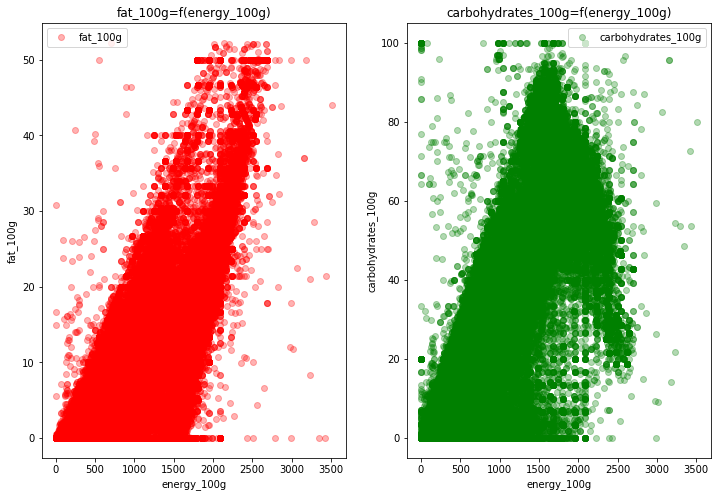

In [28]:
fig=plt.figure(figsize=(12,8))
x=data["energy_100g"]
fig.add_subplot(1,2,1)
plt.scatter(x,data['fat_100g'],label='fat_100g',color='r',alpha=0.3)
plt.xlabel("energy_100g")
plt.ylabel("fat_100g")
plt.title("fat_100g=f(energy_100g)")
plt.legend()
fig.add_subplot(1,2,2)
plt.scatter(x,data['carbohydrates_100g'],label='carbohydrates_100g',color='g',alpha=0.3)
plt.xlabel("energy_100g")
plt.ylabel("carbohydrates_100g")
plt.title("carbohydrates_100g=f(energy_100g)")
plt.legend()
plt.show()

Although the high correlation wich link theses variables, theres graphics not allows us to identify any model can link each
pair of theses variables.

<font color='blue'>fat_100g</font>

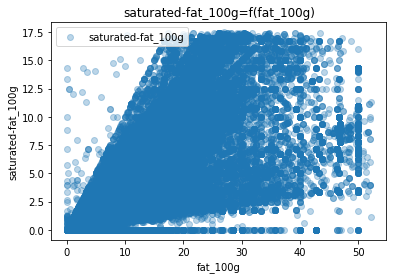

In [29]:
plt.scatter(data['fat_100g'],data['saturated-fat_100g'],label='saturated-fat_100g',alpha=0.3)
plt.xlabel('fat_100g')
plt.ylabel('saturated-fat_100g')
plt.title("saturated-fat_100g=f(fat_100g)")
plt.legend(loc='upper left')

<font color='blue'>carbohydrates_100g </font>

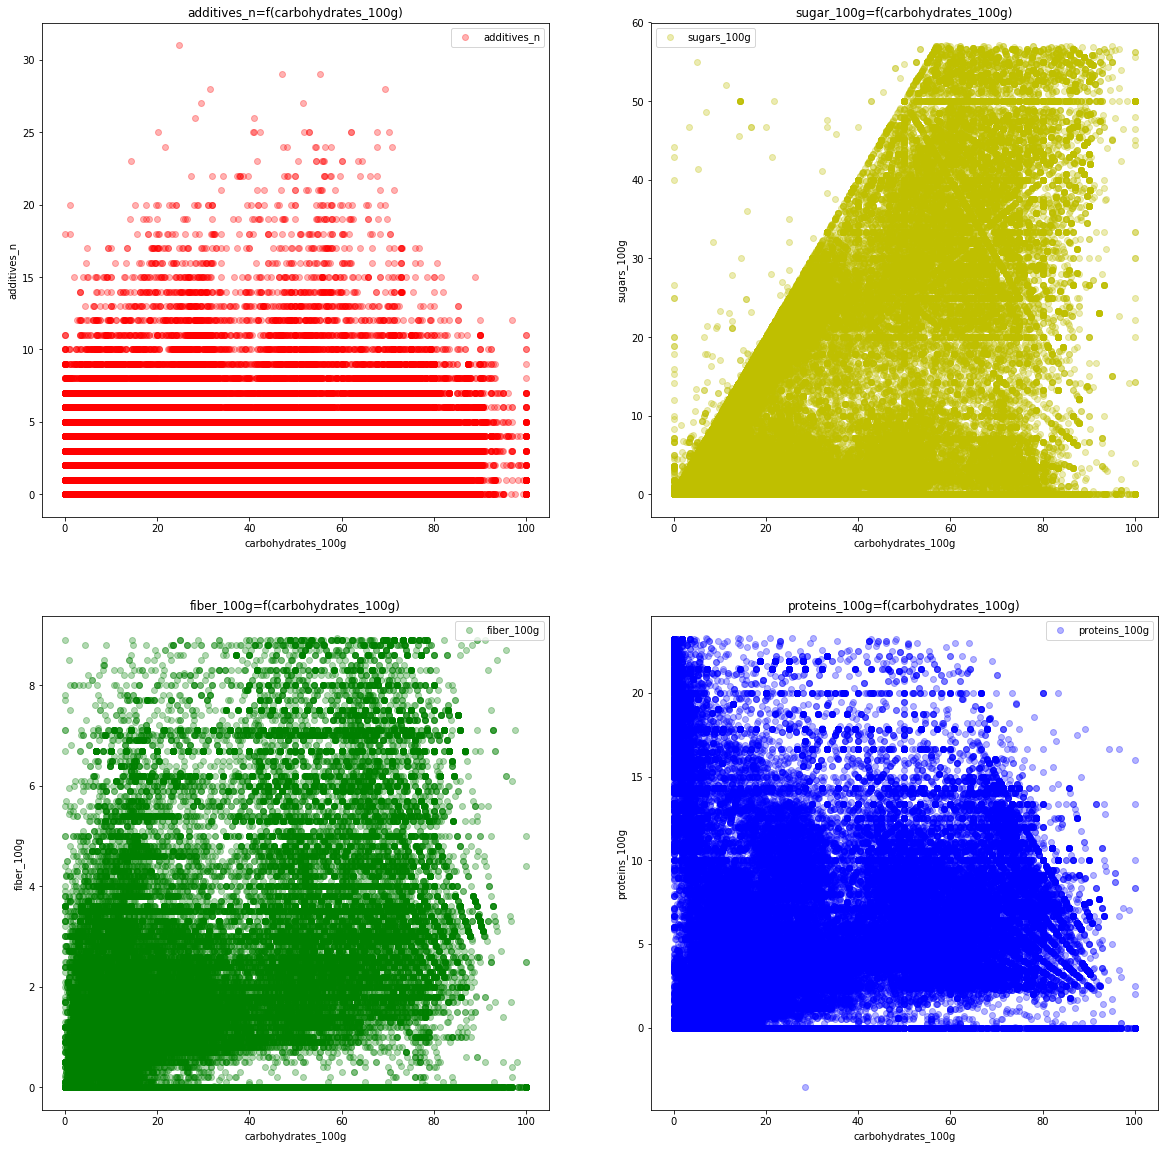

In [30]:
fig=plt.figure(figsize=(20,20))
x=data['carbohydrates_100g']
fig.add_subplot(2,2,1)
plt.scatter(x,data['additives_n'],label='additives_n',color='r',alpha=0.3)
plt.ylabel('additives_n')
plt.xlabel('carbohydrates_100g')
plt.title("additives_n=f(carbohydrates_100g)")
plt.legend()
fig.add_subplot(2,2,2)
plt.scatter(x,data['sugars_100g'],label='sugars_100g',color='y',alpha=0.3)
plt.xlabel('carbohydrates_100g')
plt.ylabel("sugars_100g")
plt.title("sugar_100g=f(carbohydrates_100g)")
plt.legend()
fig.add_subplot(2,2,3)
plt.scatter(x,data['fiber_100g'],label='fiber_100g',color='g',alpha=0.3)
plt.xlabel('carbohydrates_100g')
plt.ylabel('fiber_100g')
plt.title("fiber_100g=f(carbohydrates_100g)")
plt.legend()
fig.add_subplot(2,2,4)
plt.scatter(x,data['proteins_100g'],label='proteins_100g',color='b',alpha=0.3)
plt.xlabel('carbohydrates_100g')
plt.ylabel('proteins_100g')
plt.title("proteins_100g=f(carbohydrates_100g)")
plt.legend()
plt.show()

Although the high correlation wich link theses variables, theres graphics not allows us to identify any model can link each pair of theses variables.

<font color='blue'>salt_100g</font>

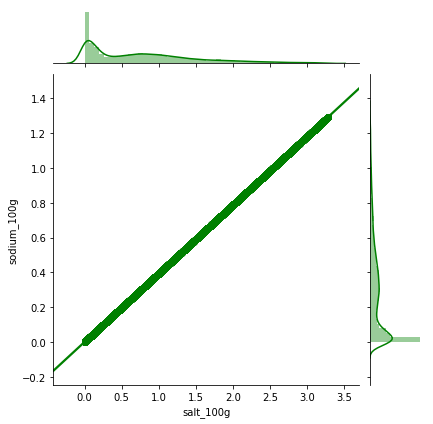

In [31]:

x=data["salt_100g"]

sns.jointplot(x,data['sodium_100g'],color='g',kind='reg')


The graphic above show a perfect lineair link between the variable sodium_100g and salt_100g. A bove all, the pearson correlation between them equal to 1. So the lineair relation between them is perfect.

In [32]:
#We will estimate the coefficient of the best linear regression between sodium_100g and salt_100g.
a=np.cov(data['sodium_100g'],data['salt_100g'])[1,0]/data['salt_100g'].var(ddof=1)
b=data['sodium_100g'].mean()-a*data['salt_100g'].mean()
print("a={}".format(a))
print("b={}".format(b))

a=0.3937004591053414
b=2.7587459594524688e-08


We can now write sodium_100g in function of salt_100g with the following lineair function:  
<font color='red'><G>sodium_100g=a*salt_100g+b</G></font>


<font color='blue'>nutrition-score-fr_100g</font>

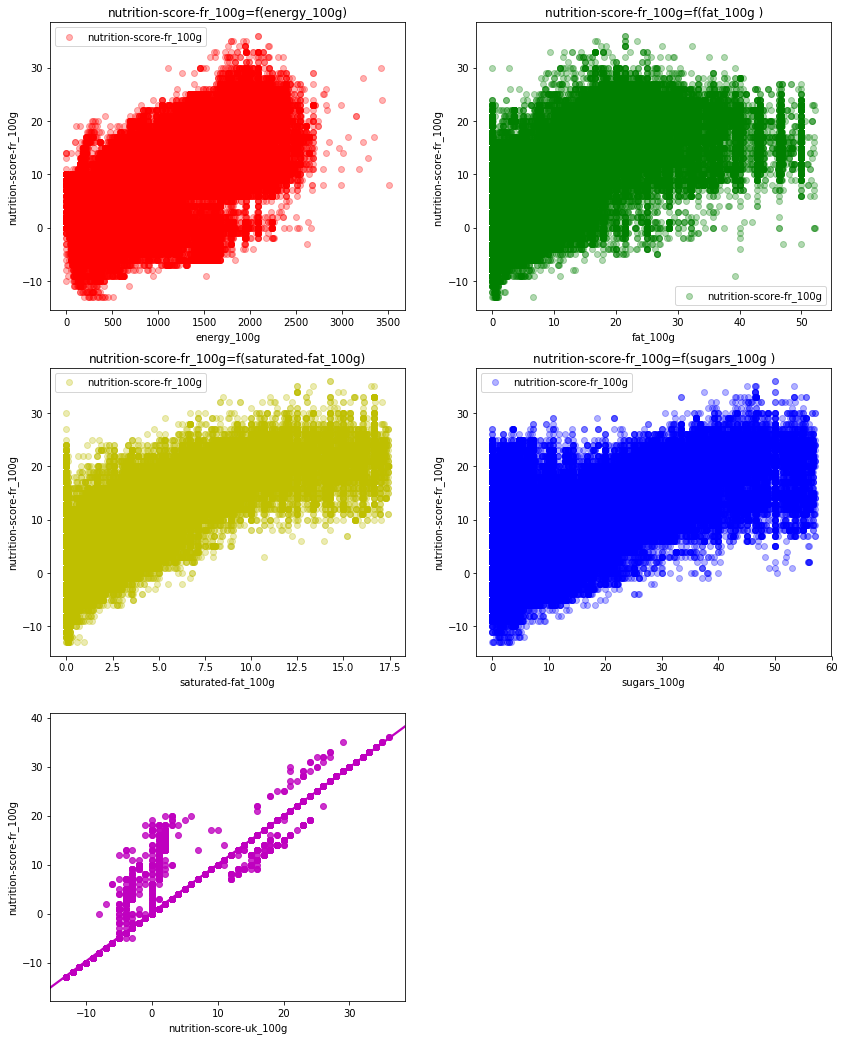

In [33]:
fig=plt.figure(figsize=(14,18))
fig.add_subplot(3,2,1)
y=data['nutrition-score-fr_100g']
plt.scatter(data['energy_100g'],y,label='nutrition-score-fr_100g',color='r',alpha=0.3)
plt.xlabel('energy_100g')
plt.ylabel('nutrition-score-fr_100g')
plt.title("nutrition-score-fr_100g=f(energy_100g)")
plt.legend()
fig.add_subplot(3,2,2)
plt.scatter(data['fat_100g'],y,label='nutrition-score-fr_100g',color='g',alpha=0.3)
plt.xlabel('fat_100g')
plt.ylabel('nutrition-score-fr_100g ')
plt.title("nutrition-score-fr_100g=f(fat_100g )")
plt.legend()
fig.add_subplot(3,2,3)
plt.scatter(data['saturated-fat_100g'],y,label='nutrition-score-fr_100g',color='y',alpha=0.3)
plt.xlabel('saturated-fat_100g')
plt.ylabel('nutrition-score-fr_100g')
plt.title("nutrition-score-fr_100g=f(saturated-fat_100g)")
plt.legend()
fig.add_subplot(3,2,4)
plt.scatter(data['sugars_100g'],y,label='nutrition-score-fr_100g',color='b',alpha=0.3)
plt.xlabel('sugars_100g')
plt.ylabel('nutrition-score-fr_100g')
plt.title("nutrition-score-fr_100g=f(sugars_100g )")
plt.legend()
fig.add_subplot(3,2,5)
sns.regplot(data['nutrition-score-uk_100g'],y,color='m')


From the graphics aboves , we can notice that:  
    -The function that can link nutrition-score-fr_100g by one of the variable energy_100, fat_100g, saturated-
    fat_100g or sugars_100g, is not an application. it means that for one value of theses variables
    (energy_100g,  fat_100g, saturated-fat_100g,sugars_100g),the value of nutrition-score-fr is not constant and can 
    takes differents values.  
    -The graphic of nutrition-score-fr_100g in function of energy_100g,fat_100g,saturated-fat_100g or sugars_100g, are
    practically the same.  
    -High positive correlation for the nutrition-score-fr with simultaneously energy_100, fat_100g,saturated-fat_100g and
    sugars_100.    
===> This will urge us to look for a relation that link the variable nutrition-score-fr_100g with theses variables in same time and in the same relation. This relation might allow us to predict the nutrition-score-fr when we know the value of theses variables.
    

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X=data[['energy_100g','fat_100g','saturated-fat_100g','sugars_100g']]
Y=data['nutrition-score-fr_100g']
x_train,x_test,y_train,y_test=train_test_split(X,Y,train_size=0.5)
regressor=LinearRegression()
regressor.fit(x_train,y_train)


/home/taher/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [35]:
#We will calculate les coefficients de regression linéaire de 
#nutrition-score-fr_100g=f('energy_100g','fat_100g','saturated-fat_100g','sugars_100g')
df_coefficient=pd.DataFrame(regressor.coef_,X.columns,columns=["coefficients"])
df_coefficient

coefficients
energy_100g             0.000933
fat_100g                0.178559
saturated-fat_100g      0.847122
sugars_100g             0.217852

In [36]:
y_pred=regressor.predict(x_test)

In [37]:
#We will now test the robustness of the model.
from sklearn import metrics 
regression_score=metrics.r2_score(y_test,y_pred)
explained_variance_score=metrics.explained_variance_score(y_test,y_pred)
pd.DataFrame([regression_score,explained_variance_score],index=["regression_score","explained_variance_score"],columns=["robustesse"])

robustesse
regression_score            0.750178
explained_variance_score    0.750180

So we can consider that the model , which defined by:
<font color='red'>0.000971 * energy_100g+0.177920 * fat_100g+0.842 * saturated-fat_100g+0.216 * sugars_100g</font>    
as a model which can allow us to predict the value of nutrition-score-fr_100g of one product, from  values
of simultaneously energy_100, fat_100g, saturated- fat_100g and sugars_100g.

We should notice also the high value of pearson correlation between nutrition-score-fr and nutrition-score-uk_100g ,which
get be confirmed by the graphic linked them showing the perfect linear relation between them. Herreunder, we will estimate
the parametrs define the best linear realation between them.

In [38]:
#Estimate the parametrs of the best linear regression between nutrition-score-fr and nutrition-score-uk_100g.
c=np.cov(data["nutrition-score-fr_100g"],data["nutrition-score-uk_100g" ])[1,0]/data["nutrition-score-uk_100g"].var(ddof=1)
β=data["nutrition-score-fr_100g"].mean()-c*data["nutrition-score-uk_100g" ].mean()
print("c={}".format(c))
print("β={}".format(β))

c=0.9897134702535476
β=0.16229073987685005


We can now write nutrition-score-fr_100g in function of nutrition-score-uk_100g with the following lineair function:
<font color="red">nutrition-score-fr_100g= c * nutrition-score-uk_100g + β </font>

# Feature engineering

We will create a new quantitative variable namely n_ingredients. This new variable will measure the numbre of ingredients
used for each product. The number of ingredient is a good indice , which can give idea about the healthiness of the
product.

We have the column "ingredients_text", describe the list of ingredient which used each product. This column gives
the different ingredients used, seperated by ",".So we will define a function, which can underline the number of ingredients used in a product from a text.

In [39]:
# define function,which can underline a number of string seperated by the symbol",".
def n_str(chaine,c):
    """"This function ,allow to calculate the number of string seperated by the symbol c.
        The symbol c introduced as a parameter in the function.
        
        Args:
        
        chaine(str): This is the string that the function will examinate to calculate the number of substrings 
                    seperated by the symbol introduced as a parametre of the function.
        c(str): this the symbol , which seperate substrings in the introduced string.
        
        Returns:
        
        numbre(int): the number of substrings, which seperated by the introduced symbole  in the introduced string.
    """
    li=chaine.split(c)
    return len(li)

In [40]:
data["n_ingredients"]=[n_str(c,",")for c in data['ingredients_text']] #introduce the variable of n_ingredients

In [41]:
data["n_ingredients"].head()# the first values of the column n_ingredients.

0    13
1    25
2    12
3    22
4    13
Name: n_ingredients, dtype: int64

# Conclusion 

-80% of products are not very healthy.  
-The quantity of energy in one product, is highly correlated to the quantity of fat and carbohydrates on it .  
-The quantity of fat in one product is highly correlated to the quantity of saturated fat on it.  
-The quantity of carbohydrates in one product is highly correlated to the quantity of sugar , fiber, proteins and the number of additives used on the product.  
-The quantity of salt is linked to the quantity of sodium by a linear relation.  
-We can infer the healthiness of the product by calculate his score deteminated by (0.000971 energy_100g+0.177920 fat_100g+0.842 saturated-fat_100g+0.216 sugars_100g)

